<a href="https://colab.research.google.com/github/saintroger/MSDS/blob/main/SaintRoger_BountsebeEboueme_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


df_taxis = sns.load_dataset('taxis')
df_taxis.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


# **Q1** **a**

In [2]:
model = ols(formula = 'total ~ distance + passengers', data=df_taxis)
res = model.fit()
print('The RSquare is', res.rsquared)
res.summary()


The RSquare is 0.8184911794925387


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 1.450e+04
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:38:39   Log-Likelihood:                -20530.
No. Observations:                6433   AIC:                         4.107e+04
Df Residuals:                    6430   BIC:                         4.109e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5156      0.132     64.447      0.000       8.257       8.775
distance       3.2649      0.019    170.254      0.000       3.227       3.303
passengers     0.0826      0.061      1.354      0.176      -0.037       0.202
==============================================================================
Omnibus:                     8989.441   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5652441.382
Skew:                           7.826   Prob(JB):                         0.00
Kurtosis:                     147.371   Cond. No.                         9.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Q1** **b**

In [3]:
model = ols(formula = 'total ~ distance + passengers + color', data=df_taxis)
res = model.fit()
print('The square is', res.rsquared)
res.summary()


The square is 0.8286465295996958


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                 1.036e+04
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:38:42   Log-Likelihood:                -20345.
No. Observations:                6433   AIC:                         4.070e+04
Df Residuals:                    6429   BIC:                         4.073e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.3515      0.207     25.879      0.000       4.946       5.757
color[T.yellow]     3.8950      0.200     19.520      0.000       3.504       4.286
distance            3.2808      0.019    175.898      0.000       3.244       3.317
passengers         -0.0372      0.060     -0.625      0.532      -0.154       0.080
==============================================================================
Omnibus:                     9394.090   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6982523.917
Skew:                           8.501   Prob(JB):                         0.00
Kurtosis:                     163.502   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Q2**


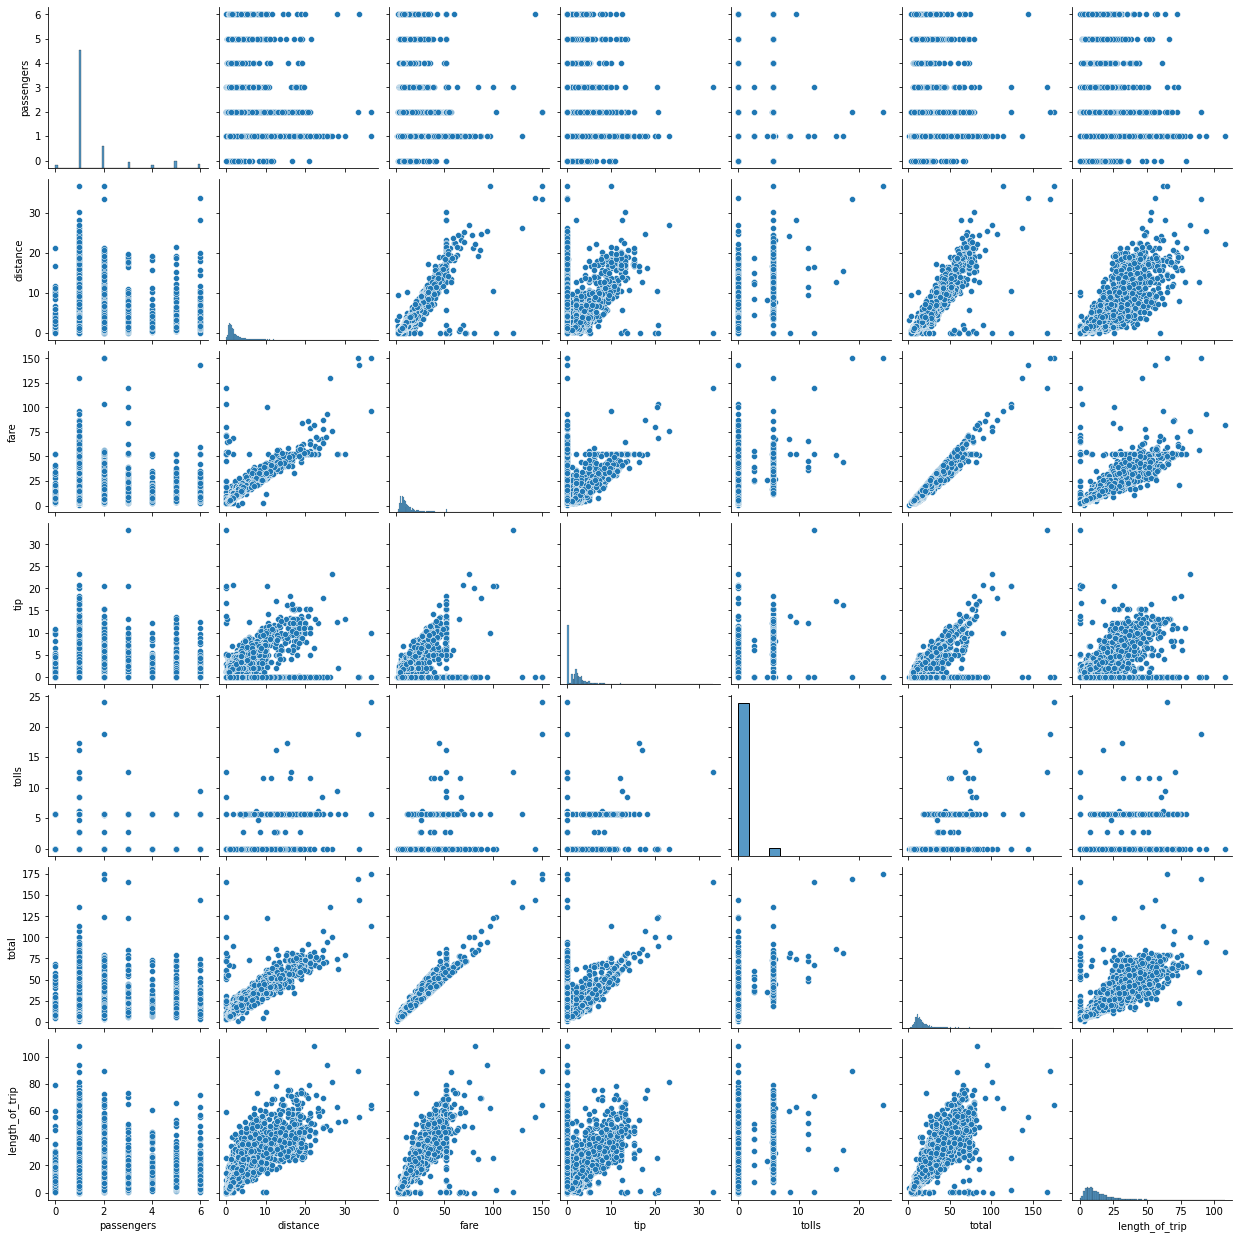

In [4]:
#creating length of ride varaible 
df_taxis.dtypes
pd.to_datetime(df_taxis['pickup'])
length_Of_ride = pd.to_datetime(df_taxis['dropoff']) - pd.to_datetime(df_taxis['pickup'])
df_taxis['length_of_trip'] = length_Of_ride / pd.Timedelta('60s')

# finding variable that correlates with 
sns.pairplot(df_taxis)


In [5]:
#create new model 
model = ols(formula = 'total ~ distance + passengers + fare + tip + length_of_trip', data=df_taxis)
res = model.fit()
res.summary()
print('The new rsquared improved', res.rsquared)

The new rsquared improved 0.9878125700290058


# **Q3**


In [6]:
#Create validation set 
from sklearn.model_selection import train_test_split
train, val = train_test_split(df_taxis, test_size=0.1)
len(train)

5789

# **Q4**


In [8]:
#Train model with length_of_trip
model = ols(formula='total ~ distance + passengers + color+ length_of_trip', data=train)
res = model.fit()

y_pred = res.predict(val)
y = val['total']
print(res.summary())
y_mean = train['total'].mean()  # use the mean of the training set

TSS = sum((y_pred - y_mean)**2)
RSS = sum((y_pred - y)**2)
print(f'This model has an R^2 on the test set of {(TSS - RSS) / TSS}')


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     7803.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:39:59   Log-Likelihood:                -18079.
No. Observations:                5789   AIC:                         3.617e+04
Df Residuals:                    5784   BIC:                         3.620e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.3634      0.222     

In [9]:
#Train model with length_of_trip
model = ols(formula = 'total ~ distance + passengers + color', data=train)
res = model.fit()

y_pred = res.predict(val)
print(res.summary())
y = val['total']
y_mean = train['total'].mean()  # use the mean of the training set

TSS = sum((y_pred - y_mean)**2)
RSS = sum((y_pred - y)**2)
print(f'This model has an R^2 on the test set of {(TSS - RSS) / TSS}')


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     9173.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:40:04   Log-Likelihood:                -18383.
No. Observations:                5789   AIC:                         3.677e+04
Df Residuals:                    5785   BIC:                         3.680e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.3966      0.218     

This model is more accurate with the length_Of_trip variable added to the model since the rsquare is higher when the variable is included in the model

# **Q5**

In [79]:
#create Airport not_airport vairable
df_taxis['pickup_zone'].dropna()
def airport_or_not(y):
  if 'Airport' in str(y):
   # print('work')
    return 1
  else: 
   # print('0')
    return 0
array = []
for x in df_taxis['pickup_zone']:
  array.append(airport_or_not(x))
df_taxis['pick_is_airport']=array

array1=[]
for x in df_taxis['dropoff_zone']:
  array1.append(airport_or_not(x))
df_taxis['drop_is_airport'] = array1

df_taxis['is_airport'] = df_taxis['drop_is_airport'] + df_taxis['pick_is_airport']
df_taxis['is_airport'].sum()

#model
train, val = train_test_split(df_taxis, test_size=0.1)
model = ols(formula='total ~ distance + passengers + color + length_of_trip + is_airport', data=train)
res = model.fit()
res.summary()
print('The new rsquared improved', res.rsquared)

The new rsquared improved 0.861367366879551


# **Q6**

You should not include fare or tip to predict the total because fare depend on distance and tip mostly depends on fare. Also we have this problem of leakage, because we want to predict total and fare and tip alone gives us a good estimate of total. 